In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

hh_df_init = pd.read_csv('./data/hh_database.csv', sep=';')

In [2]:
hh_df_init.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [3]:
hh_df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

<Axes: title={'center': 'qqq'}>

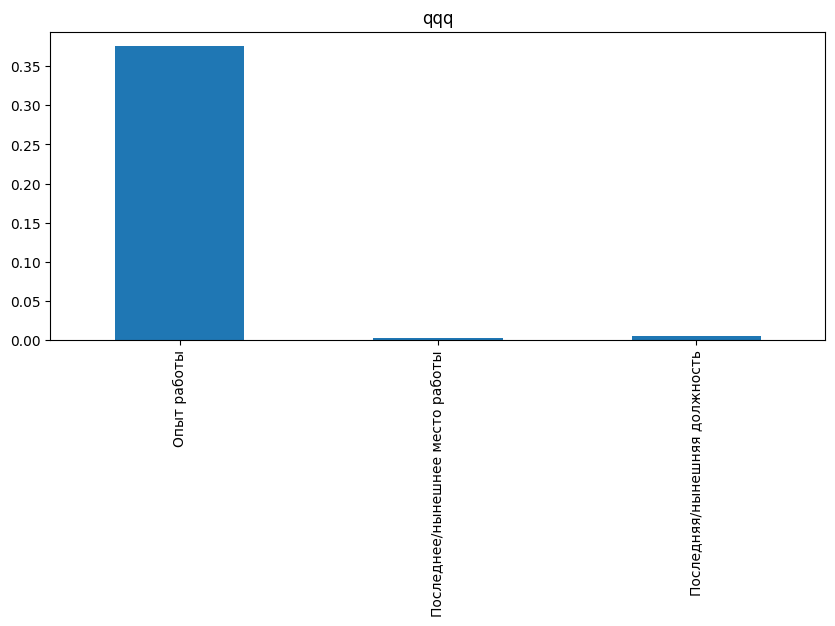

In [4]:
cols_with_null_percent = hh_df_init.isna().mean() * 100

cols_with_null = cols_with_null_percent[cols_with_null_percent > 0]

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='qqq'
)

In [ ]:
# Create a list of items in the current attribute
def categories_list(data, column_name):
    all_categories = data[column_name].apply(lambda x: x.split(','))
    found_categories = []
    for item in all_categories:
        for inner_item in item:
            trimmed_line = inner_item.lstrip().rstrip()
            if trimmed_line not in found_categories:
                found_categories.append(trimmed_line)
    return found_categories

# Encode current attribute to a set
def category_encode(data, categories):
    occupancies = categories
    occupancy_status = pd.Series(
        data = [False] * len(occupancies),
        index = occupancies,
        name = 'occupancy_statuses'
    )
    
    data_splitted = data.split(',')
    for index, item in enumerate(data_splitted):
        trimmed_line = item.lstrip().rstrip()
        if trimmed_line in occupancies:
            occupancy_status[trimmed_line] = True
            
    return occupancy_status

hh_df_copy01 = hh_df_init.copy()

found_categories_occupancy = categories_list(hh_df_copy01, 'Занятость')
hh_df_copy01[found_categories_occupancy] = hh_df_copy01['Занятость'].apply(lambda x: category_encode(x, found_categories_occupancy))


In [ ]:
def salary_extract(data):
    data_splitted = data.split(' ')
    data_result = pd.Series(
        data = data_splitted,
        index = ['salary', 'currency'],
        name = 'data_result'
    )
    
    data_result['salary'] = float(data_result['salary']) 
    return data_result

exchange_df_init = pd.read_csv('./data/ExchangeRates.csv', sep=',')

exchange_df = exchange_df_init.copy()

exchange_df['exchange_rate'] = exchange_df['close'] / exchange_df['proportion']
exchange_df['date1'] = pd.to_datetime(exchange_df['date'], format='%d/%m/%y', dayfirst=True).dt.date

# Salary processing and currency convertion
hh_df_copy02 = hh_df_copy01.copy()

hh_df_copy02[['salary', 'currency']] = hh_df_copy02['ЗП'].apply(salary_extract) 
hh_df_copy02['Обновление резюме'] = pd.to_datetime(hh_df_copy02['Обновление резюме'], dayfirst=True).dt.date  

currency_df = pd.DataFrame({
    'name':['грн.', 'USD', 'EUR', 'бел.руб.', 'KGS', 'сум', 'AZN', 'KZT', 'руб.'],
    'ISO_name':['UAH', 'USD', 'EUR', 'BYN', 'KGS', 'UZS', 'AZN', 'KZT', 'RUB']
},
index = ['UAH', 'USD', 'EUR', 'BYN', 'KGS', 'UZS', 'AZN', 'KZT', 'RUB']
)




    